<a href="https://colab.research.google.com/github/EdmarBortoletto/Ciencias-de-Dados/blob/main/Redes_Neurais_Recorrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense
from matplotlib import pyplot as plt
from keras.utils import pad_sequences

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500,maxlen=200)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
word2idx = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
word2idx

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
idx2wprd = {i:w for (w,i) in word2idx.items()}

In [ ]:
size_seq = 200
seq_pad_train = pad_sequences(x_train, maxlen=size_seq)
seq_pad_test = pad_sequences(x_test, maxlen=size_seq)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=500, output_dim=32, input_length=size_seq))
model.add(SimpleRNN(units=10, input_shape=(32, )))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           16000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                430       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 16441 (64.22 KB)
Trainable params: 16441 (64.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x=seq_pad_train,
                    y=y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.3)

Epoch 1/10
20/20 [==============================] - 4s 130ms/step - loss: 0.6701 - acc: 0.5975 - val_loss: 0.6670 - val_acc: 0.5793
Epoch 2/10
20/20 [==============================] - 2s 121ms/step - loss: 0.6306 - acc: 0.6640 - val_loss: 0.6058 - val_acc: 0.7199
Epoch 3/10
20/20 [==============================] - 4s 207ms/step - loss: 0.5686 - acc: 0.7667 - val_loss: 0.5560 - val_acc: 0.7588
Epoch 4/10
20/20 [==============================] - 6s 297ms/step - loss: 0.5266 - acc: 0.7772 - val_loss: 0.5269 - val_acc: 0.7789
Epoch 5/10
20/20 [==============================] - 5s 240ms/step - loss: 0.5148 - acc: 0.7737 - val_loss: 0.5106 - val_acc: 0.7836
Epoch 6/10
20/20 [==============================] - 3s 146ms/step - loss: 0.4951 - acc: 0.7911 - val_loss: 0.5045 - val_acc: 0.7915
Epoch 7/10
20/20 [==============================] - 5s 276ms/step - loss: 0.4575 - acc: 0.8193 - val_loss: 0.4787 - val_acc: 0.8000
Epoch 8/10
20/20 [==============================] - 5s 276ms/step - loss: 0.

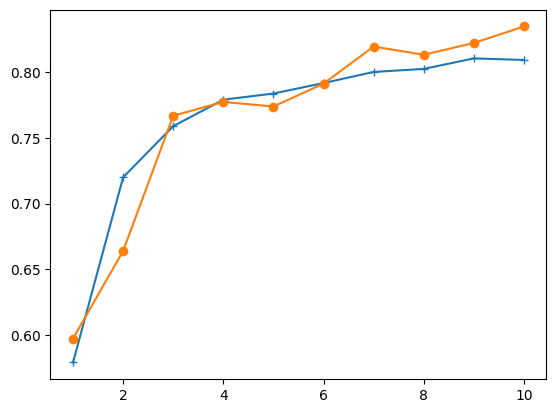

In [ ]:
plt.plot(range(1,11), history.history['val_acc'],marker='+')
plt.plot(range(1,11), history.history['acc'], marker='o')

In [ ]:
eval = model.evaluate(x=seq_pad_test, y=y_test)

459/459 [==============================] - 11s 24ms/step - loss: 0.4614 - acc: 0.8009


In [ ]:
predicts = model.predict(seq_pad_test)

459/459 [==============================] - 8s 17ms/step


In [ ]:
predicts[2]

array([0.87334365], dtype=float32)

In [ ]:
y_test[2]

1

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=500, output_dim=128, input_length=size_seq))
model.add(SimpleRNN(units=128, activation='tanh', input_shape=(32,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          64000     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 97025 (379.00 KB)
Trainable params: 97025 (379.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x=seq_pad_train,
                    y=y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/10
78/78 [==============================] - 27s 332ms/step - loss: 0.6894 - acc: 0.5248 - val_loss: 0.6899 - val_acc: 0.5384
Epoch 2/10
78/78 [==============================] - 30s 380ms/step - loss: 0.6102 - acc: 0.6607 - val_loss: 0.5381 - val_acc: 0.7344
Epoch 3/10
78/78 [==============================] - 44s 561ms/step - loss: 0.4399 - acc: 0.8048 - val_loss: 0.5523 - val_acc: 0.7550
Epoch 4/10
78/78 [==============================] - 28s 359ms/step - loss: 0.5981 - acc: 0.6575 - val_loss: 0.6634 - val_acc: 0.5962
Epoch 5/10
78/78 [==============================] - 25s 322ms/step - loss: 0.6346 - acc: 0.6351 - val_loss: 0.6431 - val_acc: 0.6088
Epoch 6/10
78/78 [==============================] - 25s 320ms/step - loss: 0.6257 - acc: 0.6517 - val_loss: 0.6193 - val_acc: 0.6930
Epoch 7/10
78/78 [==============================] - 26s 331ms/step - loss: 0.6591 - acc: 0.6025 - val_loss: 0.6678 - val_acc: 0.5793
Epoch 8/10
78/78 [==============================] - 25s 326ms/step - 

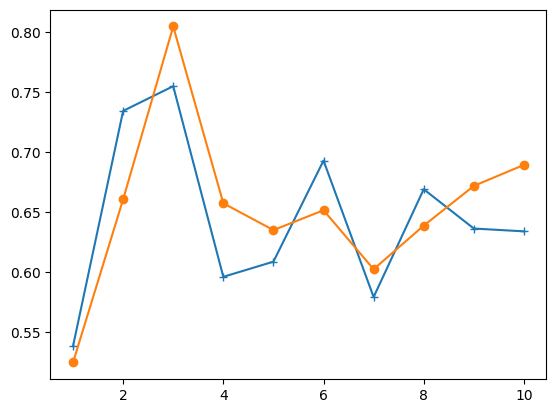

In [ ]:
plt.plot(range(1,11), history.history['val_acc'],marker='+')
plt.plot(range(1,11), history.history['acc'], marker='o')

In [ ]:
eval = model.evaluate(x=seq_pad_test, y=y_test)

459/459 [==============================] - 11s 25ms/step - loss: 0.6077 - acc: 0.6562


In [ ]:
predicts = model.predict(seq_pad_test)

459/459 [==============================] - 11s 24ms/step


In [ ]:
predicts[2]

array([0.76467], dtype=float32)

In [ ]:
y_test[2]

1